1. Importing Libs and images

In [1]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
from scipy import misc
i = misc.face(gray = True)

C:\Users\Dips\AppData\Local\Temp\ipykernel_10848\1141747070.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  i = misc.face(gray = True)


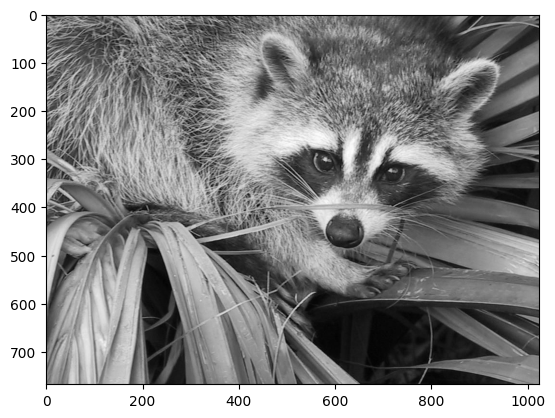

In [4]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('on')
plt.imshow(i)
plt.show()

In [9]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

2. Apply filter on Image

In [6]:
filter = [[1,0,-1],
          [1,0,-1],
          [1,0,-1]]

In [10]:
for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        convolution = 0.0
        convolution = convolution + (i[x-1, y-1] * filter[0][0])
        convolution = convolution + (i[x-1, y] * filter[0][1])
        convolution = convolution + (i[x-1, y+1] * filter[0][2])

        convolution = convolution + (i[x, y-1] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x, y+1] * filter[1][2])

        convolution = convolution + (i[x+1, y-1] * filter[2][0])
        convolution = convolution + (i[x+1, y] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])

        if (convolution<0):
            convolution = 0
        if (convolution>255):
            convolution = 255
        i_transformed[x,y] = convolution

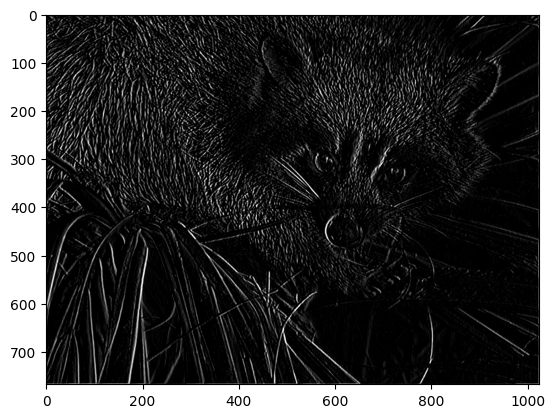

In [11]:
# Plot the image
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

3. MaxPooling

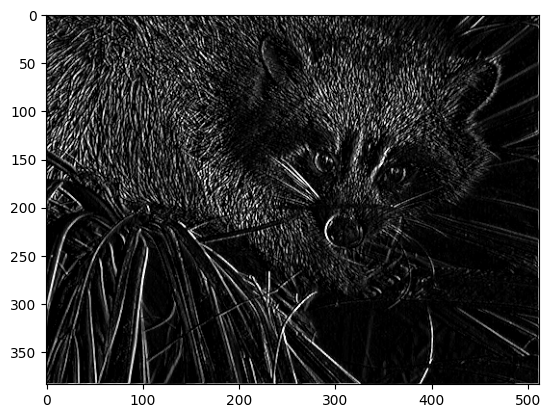

In [12]:
new_x = int(size_x/2)
new_y = int(size_y /2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(i_transformed[x,y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1 , y+1])
        newImage[int(x/2), int(y/2)] = max(pixels)

        # Plot the image
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()